<a href="https://colab.research.google.com/github/ziedjouini/new_projet/blob/main/car_price_pred_udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#importe librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [97]:
df= pd.read_csv("/content/car+data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [99]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [100]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### check mising values


In [101]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [102]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [103]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [104]:
pd.DataFrame(df['Seller_Type'].value_counts()).reset_index()

,index,Seller_Type
0,Dealer,195
1,Individual,106


In [105]:
pd.DataFrame(df['Transmission'].value_counts()).reset_index()

,index,Transmission
0,Manual,261
1,Automatic,40


changer en numerique


In [106]:
df.replace({'Fuel_Type':{'Petrol':'0','Diesel':'1','CNG':'2'}},inplace=True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


deuxieme methode changer categorie en valeur numerique

In [107]:
from sklearn.preprocessing import LabelEncoder

# un DataFrame 'df' avec une colonne 'Transmission' à encoder
le = LabelEncoder()
"df['col_encoded'] = le.fit_transform(df['col'])"

"df['col_encoded'] = le.fit_transform(df['col'])"

In [108]:
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [109]:
pd.DataFrame(df['Transmission'].value_counts()).reset_index()

,index,Transmission
0,1,261
1,0,40


In [110]:
pd.DataFrame(df['Seller_Type'].value_counts()).reset_index()

,index,Seller_Type
0,0,195
1,1,106


split my data frame  on X and y

In [111]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [114]:
# Create a LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = model.predict(X_test)

In [116]:
y_pred

array([ 2.96670467,  8.3025584 ,  6.05620758, -1.46814968,  9.25713882,
        7.032306  ,  1.35164871,  0.8268692 ,  1.37173108,  7.10742891,
        8.74382695,  0.58613312,  8.50347194,  3.42803571,  6.50183791,
        3.08701389,  0.46323861, 10.8959559 ,  1.76487652,  2.36736645,
        0.37538646,  7.73247978,  6.2075281 ,  2.64722707,  0.78232086,
        3.72073841,  5.33393873,  2.83824054,  2.16090172,  1.77220708,
        0.37859447,  8.79078642, -0.7007019 ,  2.2988819 ,  8.21516023,
        4.54037167,  7.35322104,  7.6823757 ,  2.91768184,  8.08080852,
        3.99669454,  4.34672417,  4.36388106,  0.61018923,  6.94478948,
        0.47281585,  7.41596672, 11.44059317,  3.14822313,  4.95097368,
        6.86250813,  2.19862524, 20.53946595, 16.79146986,  7.13952545,
        9.830903  ,  4.49886186,  8.62078376,  1.810855  ,  7.67299866,
        0.21098592])

In [117]:
# Convert the array to a DataFrame with a single column named 'Column_Name'
df_pred = pd.DataFrame({'prediction_price': y_pred})

# Display the DataFrame
df_pred

,prediction_price
0,2.966705
1,8.302558
2,6.056208
3,-1.468150
4,9.257139
...,...
56,4.498862
57,8.620784
58,1.810855
59,7.672999


In [118]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

In [119]:
print("coefficient :",model.coef_)

coefficient : [ 3.63622678e-01  4.39942393e-01 -5.46717653e-06  1.32389894e+00
 -1.16866879e+00 -1.63644708e+00 -9.20154941e-01]


In [120]:
print("interception :",model.intercept_)

interception : -729.0475009952123


In [121]:
for i, j in zip (X.columns, model.coef_):
  print(i,j)

Year 0.3636226783366095
Present_Price 0.43994239289780923
Kms_Driven -5.467176527496065e-06
Fuel_Type 1.3238989404405033
Seller_Type -1.168668792546792
Transmission -1.6364470751559488
Owner -0.920154940879364


In [122]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.5289272538944014
R-squared: 0.8468053957655798


In [135]:
from sklearn.metrics import mean_absolute_error



# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.2217615462334326


In [129]:
# prediction of several values and adding of a new column 'predict' :
df['predict_price'] = model.predict(X)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,predict_price
0,ritz,2014,3.35,5.59,27000,0,0,1,0,3.963790
1,sx4,2013,4.75,9.54,43000,1,0,1,0,6.574364
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,7.038703
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,2.358590
4,swift,2014,4.60,6.87,42450,1,0,1,0,5.766348
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0,8.620784
297,brio,2015,4.00,5.90,60000,0,0,1,0,4.283378
298,city,2009,3.35,11.00,87934,0,0,1,0,4.192628
299,city,2017,11.50,12.50,9000,1,0,1,0,9.516968


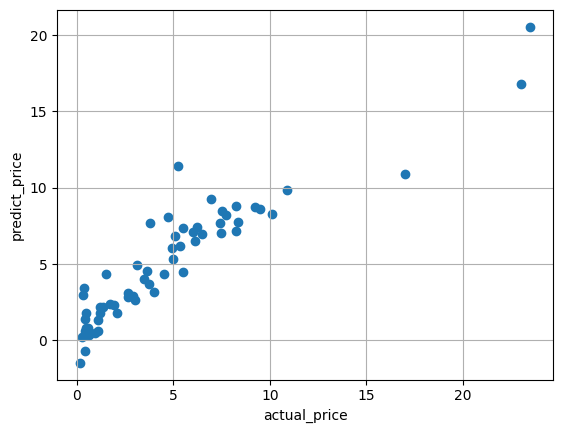

In [134]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_price')
plt.ylabel('predict_price')
plt.grid(True)
plt.show()

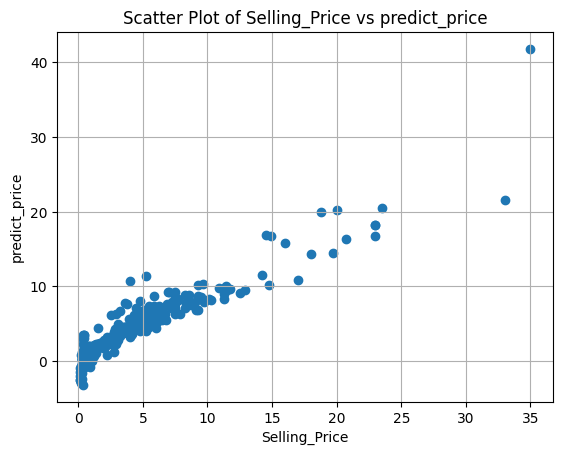

In [133]:
plt.scatter(df['Selling_Price'],df['predict_price'])

plt.xlabel('Selling_Price')
plt.ylabel('predict_price')
plt.title('Scatter Plot of Selling_Price vs predict_price')
plt.grid(True)
plt.show()